# CLUB DUB AND THE PRIMO NEIGHBORHOOD
Hey! We're Spencer Reisig, Dan Li, and Tom Halsey! Here's How we determined the best neighborhood:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('display.max_rows',100)

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
pgh_crime_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
neighborhoods = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/9890875b-c1d1-4e64-8fc9-a4a8dc433745/download/housing.csv")
neighborhood_list = neighborhoods.loc[:, "Neighborhood"]                                             

In [4]:
count_neighborhood = pgh_crime_data.groupby("INCIDENTNEIGHBORHOOD").count()
count_neighborhood.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,,
Allegheny Center,675,675,671,675,675,675,675,675,675,675,675,561,561,675,675
Allegheny West,76,76,75,76,76,76,76,76,76,76,76,73,73,76,76
Allentown,553,553,548,553,553,553,553,553,553,553,553,523,523,553,553
Arlington,171,171,170,171,171,171,171,171,171,171,171,161,161,171,171
Arlington Heights,101,101,101,101,101,101,101,101,101,101,101,96,96,101,101


In [5]:
count_neighborhood.sort_values("PK")
crime_sorted = count_neighborhood.sort_values("PK")
crime_sorted.rename(columns = {"PK":"COUNT"},inplace = True)
crime_sorted_count = crime_sorted.loc[:,"COUNT"]
crime_sorted_count.head(23)

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                12
Ridgemont                      15
Regent Square                  19
Swisshelm Park                 20
New Homestead                  23
Chartiers City                 23
Central Northside              23
East Carnegie                  29
St. Clair                      32
Outside County                 38
Outside State                  39
Oakwood                        45
Summer Hill                    46
Windgap                        60
Hays                           62
Fairywood                      63
Glen Hazel                     70
Allegheny West                 76
Golden Triangle/Civic Arena    83
Mount Oliver                   90
Polish Hill                    99
Name: COUNT, dtype: int64

Lets check out a graph of which neighborhoods have the most crime!

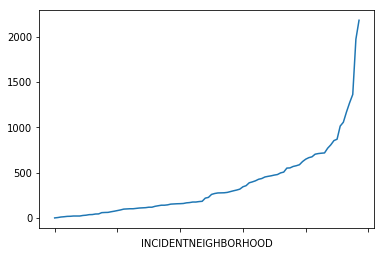

In [6]:
crime_sorted_count.plot.barh(x=('Crime Count'), figsize = (15, 15), fontsize = 7)

In [ ]:
crime_sorted_count.tail()

In [ ]:
neighborhoods = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/9890875b-c1d1-4e64-8fc9-a4a8dc433745/download/housing.csv")
                          
#neighborhoods.head()

In [ ]:
count_neighborhood = pgh_crime_data.groupby("INCIDENTNEIGHBORHOOD").count()

In [ ]:
neighborhood_list = neighborhoods.loc[:, "Neighborhood"]
neighborhood_list

In [ ]:
pgh_schools = pd.read_csv("https://data.wprdc.org/dataset/3cb2b9c2-66e2-4ffa-b0a1-35fb2c6f7230/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f/download/school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over.csv")
pgh_schools.head()

In [ ]:
# Create a filter function to knock out any district that had less then 300 total eligable students.
schools_new = pgh_schools.loc[pgh_schools['Estimate; Total:'] > 300]

In [ ]:
pd.options.mode.chained_assignment = None
school2 = schools_new
i = 0

while i < school2["Id"].size:
    school2.iloc[i, 1] = school2.iloc[i, 4] / school2.iloc[i, 2]
    i = i + 1

In [ ]:
school2.sort_values(by=['Id'], inplace=True)
i = 0
while i < school2["Id"].size:
    school2.iloc[i, 1] = school2.iloc[i, 1] * 100
    i = i + 1

In [ ]:
school2.iloc[:, 0:2]